In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from datetime import datetime, timedelta
from dateutil import parser
import seaborn as sns
import numpy as np

In [38]:
plt.rcParams.update({'font.size': 14})

In [40]:
air_polution = pd.read_csv('./datasets/air_pollution.csv', parse_dates=['date'])
air_polution_per_zipcode =  dict(tuple(air_polution.groupby('PC4')))

meteorology = pd.read_csv('./datasets/meteo.csv', parse_dates=['date'])
meteorology_per_zipcode = dict(tuple(meteorology.groupby('PC4')))

zichtop = pd.read_csv('./datasets/zichtop.csv', parse_dates=['date'])
zichtop_per_zipcode = dict(tuple(zichtop.groupby('PC4')))

mortality = pd.read_csv('./datasets/GM0772_pop_mort.csv')
mortality_per_zipcode = dict(tuple(mortality.groupby('PC4')))

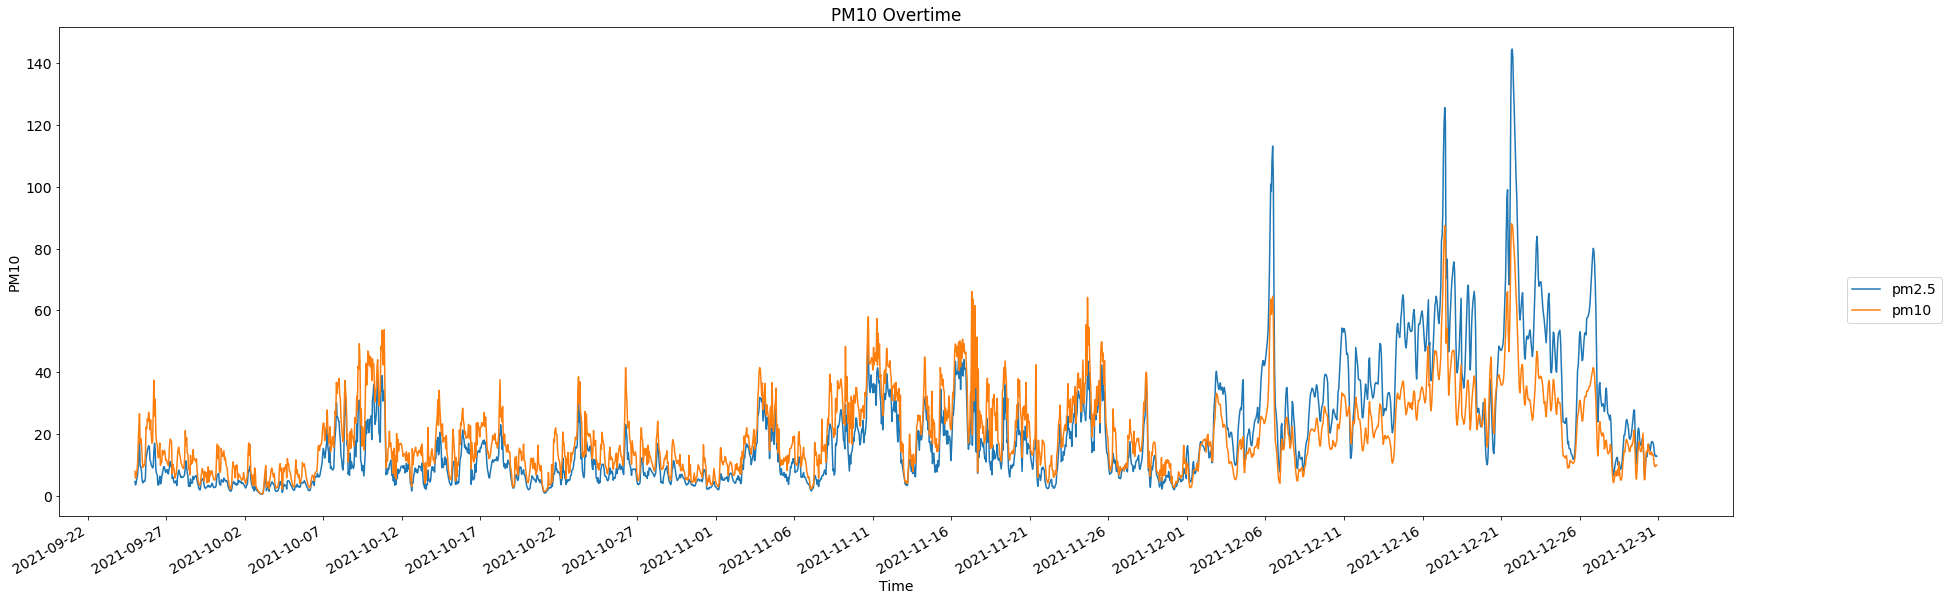

In [ ]:
df = air_polution_per_zipcode[5612]
x1 = df.date.values
y1 = df['pm2.5'].values
y2 = df['pm10'].values
y3 = df['no'].values


fig, ax = plt.subplots(figsize=(30, 10))
l1 = ax.plot(x1, y1, label="pm2.5")
l2 = ax.plot(x1, y2, label="pm10")
# l3 = ax.plot(x1, y3, label="no")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

ax.xaxis.set_major_locator(dates.DayLocator(interval=5))
fig.autofmt_xdate()

plt.ylabel('PM10')
plt.xlabel('Time')
plt.title("PM10 Overtime")
plt.show()

In [ ]:
df[df.date < "2021-10-1"]

,date,PC4,pm10,pm2.5,no2,no,so2
1608,2021-09-25 00:00:00,5612,7.864758,4.531495,26.565818,17.380828,2.309348
1609,2021-09-25 01:00:00,5612,5.563095,3.425978,16.819145,11.004015,2.149709
1610,2021-09-25 02:00:00,5612,6.333280,4.198472,17.503193,11.451557,1.985016
1611,2021-09-25 03:00:00,5612,7.906101,5.428337,17.364577,11.360867,2.035825
1612,2021-09-25 04:00:00,5612,10.083385,6.628572,17.365165,11.361251,2.248151
...,...,...,...,...,...,...,...
1747,2021-09-30 19:00:00,5612,10.587171,4.592200,27.730742,18.142986,1.781563
1748,2021-09-30 20:00:00,5612,9.410866,4.878185,22.289418,14.582970,2.195394
1749,2021-09-30 21:00:00,5612,8.968899,4.578824,20.936936,13.698102,2.208677
1750,2021-09-30 22:00:00,5612,6.190010,3.226873,15.584436,10.196200,1.871357


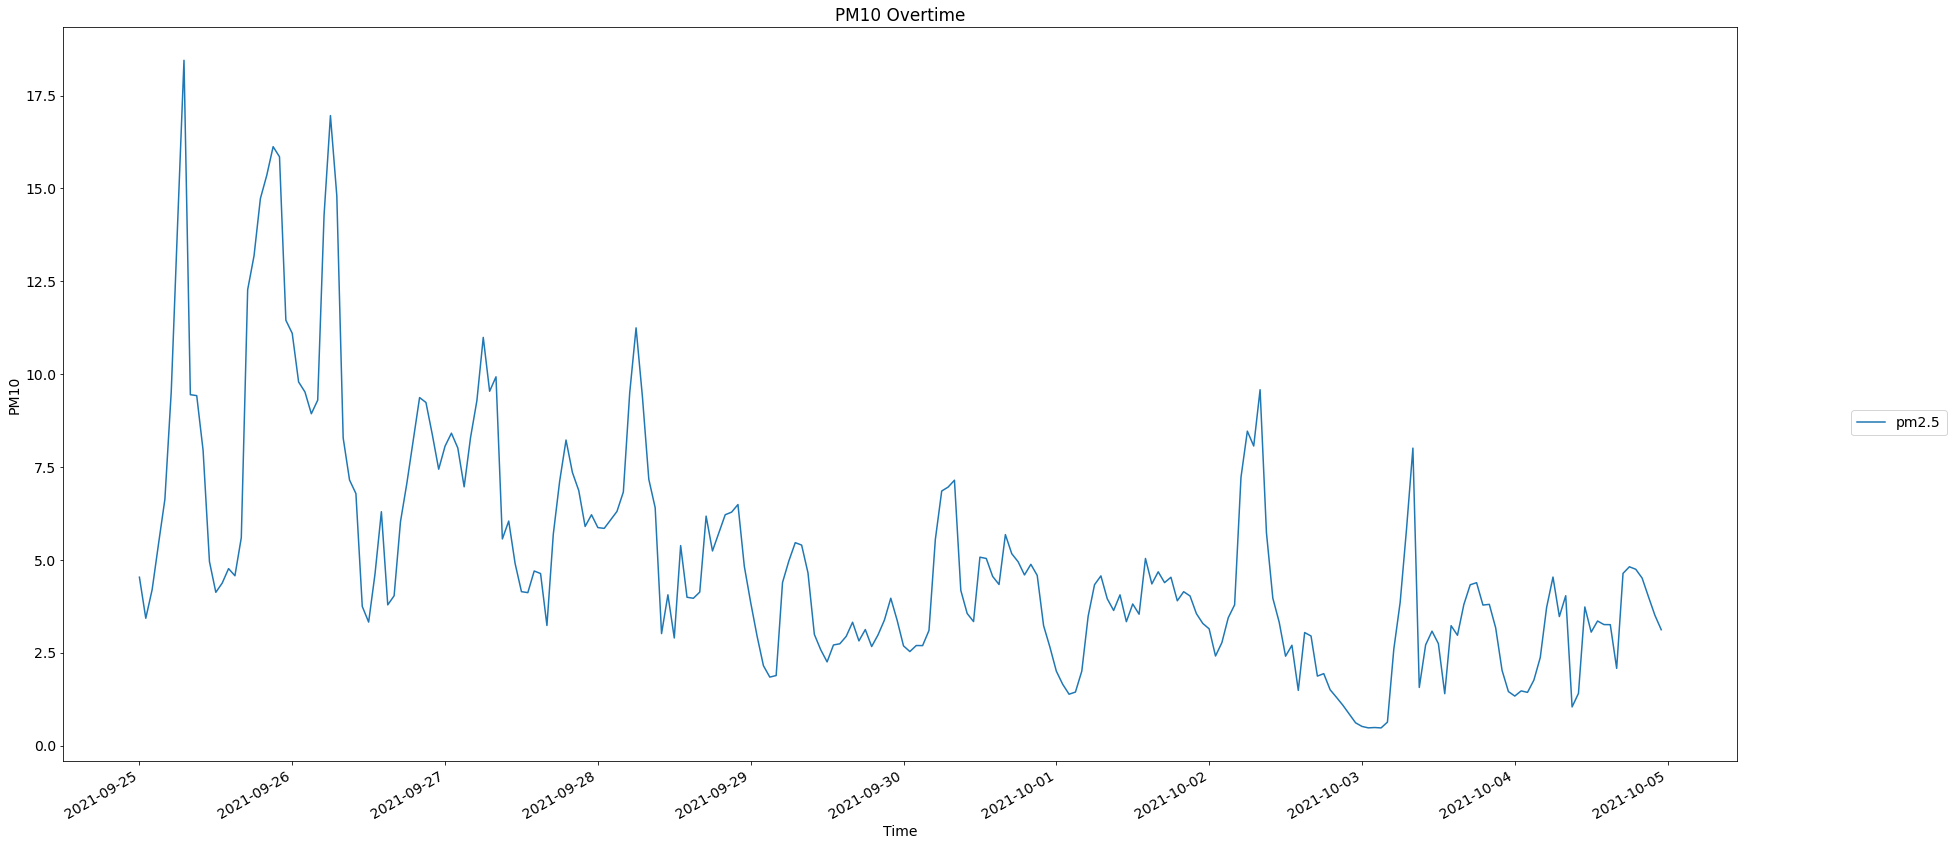

In [ ]:
df = air_polution_per_zipcode[5612]
df = df[df.date < (df.date.min() + timedelta(days=10))]
x1 = df.date
y1 = df['pm2.5'].values
y2 = df['pm10'].values
y3 = df['no'].values


fig, ax = plt.subplots(figsize=(30, 15))
l1 = ax.plot(x1, y1, label="pm2.5")
# l2 = ax.plot(x1, y2, label="pm10")
# l3 = ax.plot(x1, y3, label="no")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate()

plt.ylabel('PM10')
plt.xlabel('Time')
plt.title("PM10 Overtime")
plt.show()

In [ ]:
tips = sns.load_dataset("tips")
# sns.regplot(x="total_bill", y="tip", data=tips);
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


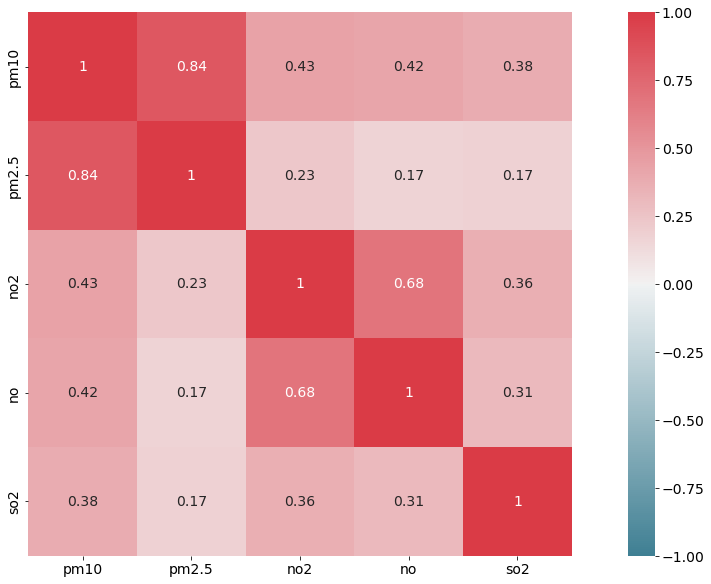

In [ ]:
df = air_polution_per_zipcode[5612]
f, ax = plt.subplots(figsize=(20, 10))
corr = df[["pm10", "pm2.5", "no2", "no", "so2"]].corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = air_polution_per_zipcode[5612]
df = df.groupby('date').mean()
df['no_lag_1'] = df['no'].shift(1)
df['time'] = np.arange(len(df.index))

X = df['time'].to_frame()
y = df['no']

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

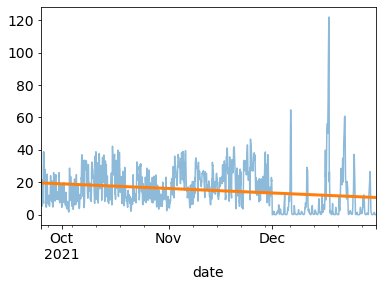

In [ ]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
# ax.set_title('Time Plot of Total Store Sales');

In [ ]:
df = air_polution_per_zipcode[5612]
df = df.groupby('date').mean()
df['no_lag_1'] = df['no'].shift(1)
# df['time'] = np.arange(len(df.index))

X = df['no_lag_1'].to_frame()
X = X.bfill()
y = df['no']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)


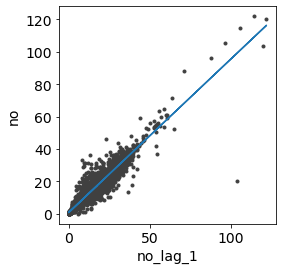

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['no_lag_1'], y, '.', color='0.25')
ax.plot(X['no_lag_1'], y_pred)
ax.set(aspect='equal', ylabel='no', xlabel='no_lag_1');

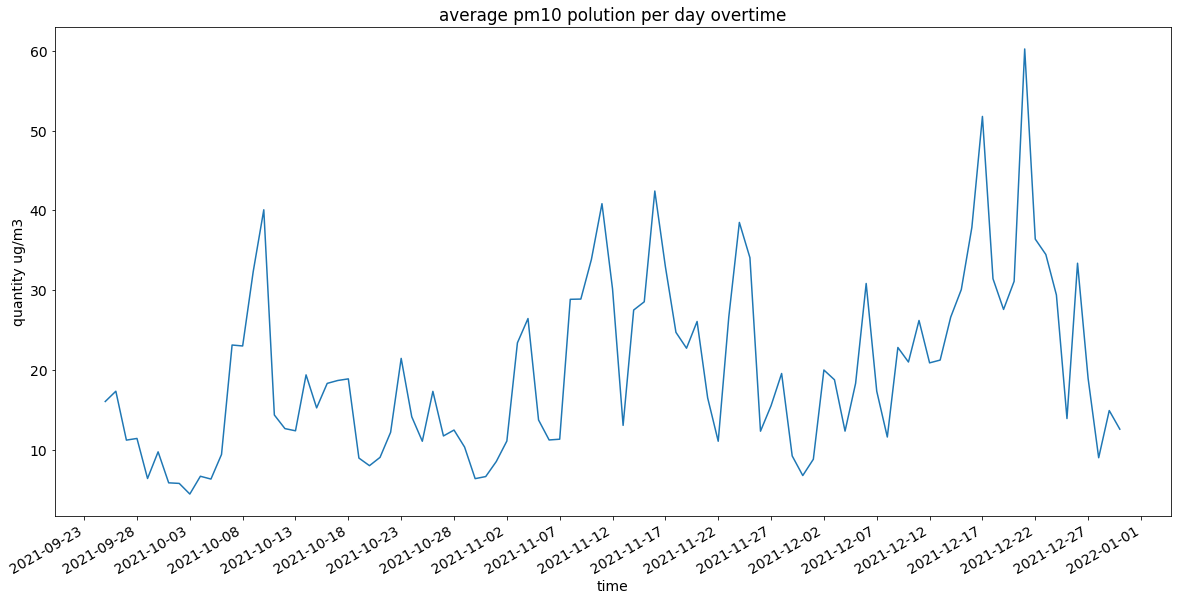

In [ ]:
df = air_polution_per_zipcode[5611]
df_perday = df.groupby(pd.Grouper(key="date", freq="D")).mean()

x = df_perday.index
y = df_perday.pm10

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.xaxis.set_major_locator(dates.DayLocator(interval=5))
fig.autofmt_xdate()

plt.title("average pm10 polution per day overtime")
plt.ylabel('quantity ug/m3')
plt.xlabel('time')
plt.show()

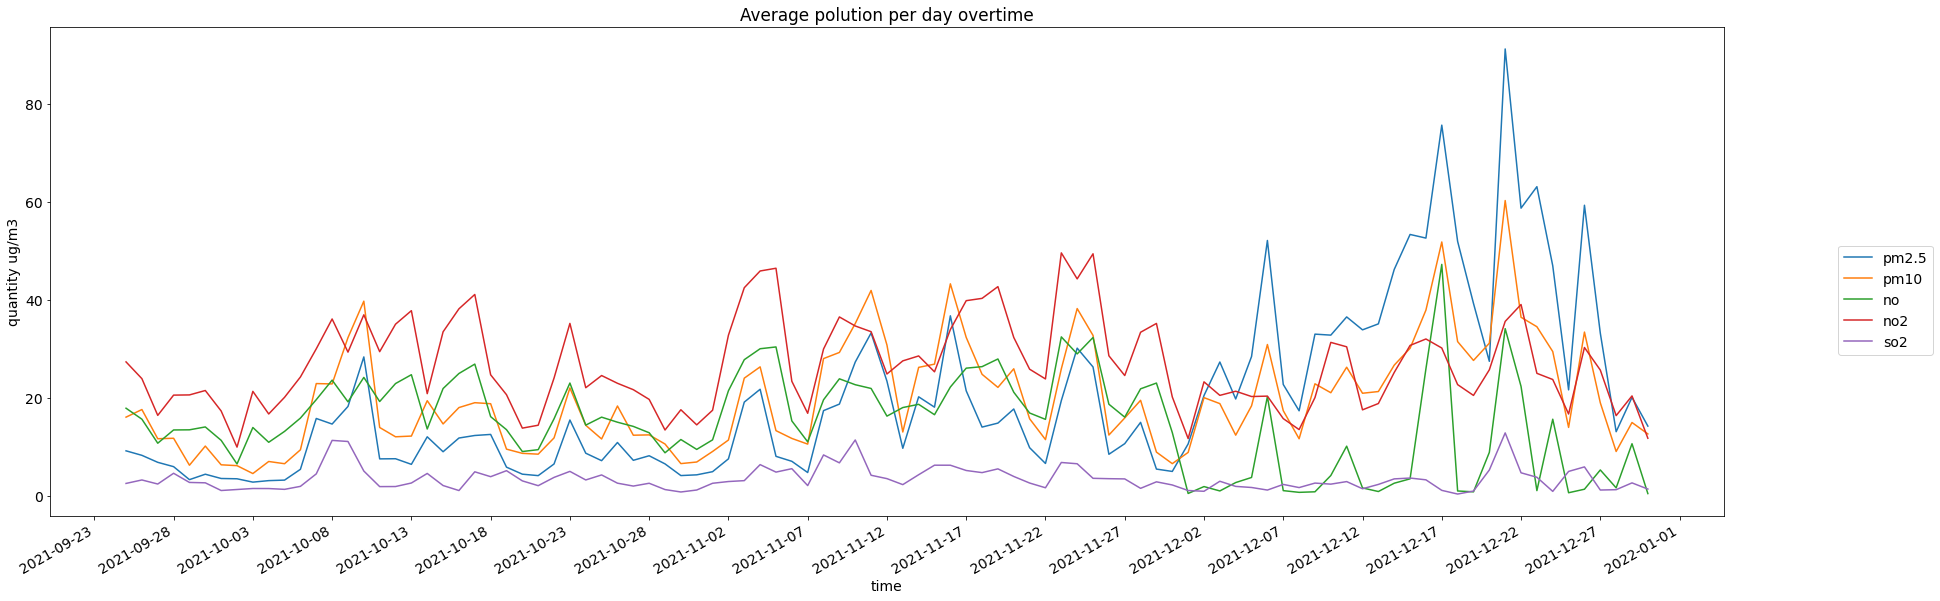

In [ ]:
df = air_polution_per_zipcode[5612]
df = df.groupby(pd.Grouper(key="date", freq="D")).mean()

x1 = df.index
y1 = df['pm2.5'].values
y2 = df['pm10'].values
y3 = df['no'].values
y4 = df['no2'].values
y5 = df['so2'].values


fig, ax = plt.subplots(figsize=(30, 10))
l1 = ax.plot(x1, y1, label="pm2.5")
l2 = ax.plot(x1, y2, label="pm10")
l3 = ax.plot(x1, y3, label="no")
l4 = ax.plot(x1, y4, label="no2")
l5 = ax.plot(x1, y5, label="so2")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

ax.xaxis.set_major_locator(dates.DayLocator(interval=5))
fig.autofmt_xdate()

plt.title("Average polution per day overtime")
plt.ylabel('quantity ug/m3')
plt.xlabel('time')
plt.show()

In [52]:
df = air_polution_per_zipcode[5612]
df[["pm10", "pm2.5", "no2", "no", "so2"]] = df[["pm10", "pm2.5", "no2", "no", "so2"]].apply(round)

(array([16.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.]),
 array([  1. ,  53.3, 105.6, 157.9, 210.2, 262.5, 314.8, 367.1, 419.4,
        471.7, 524. ]),
 <BarContainer object of 10 artists>)

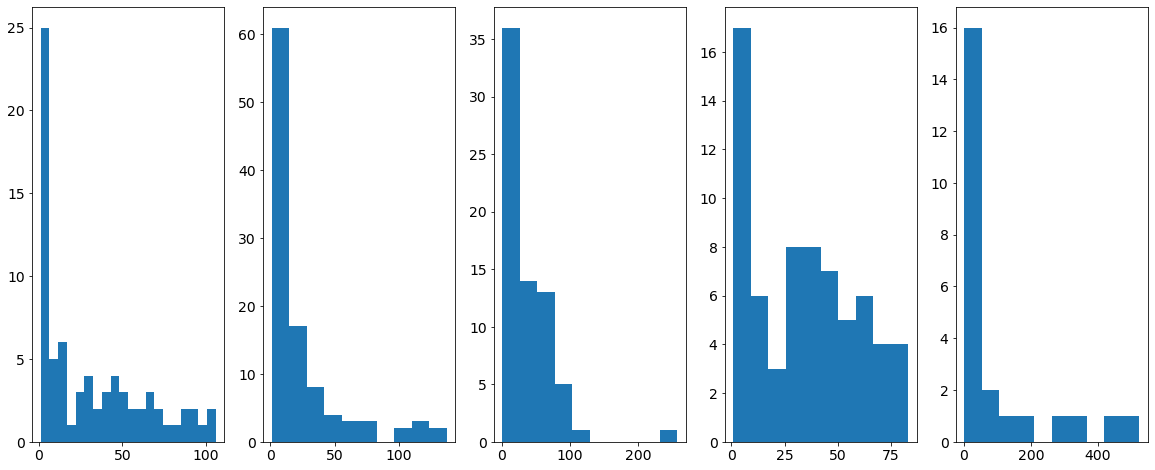

In [53]:
df.groupby(['pm10']).size()
df.groupby(['pm2.5']).size()
df.groupby(['no']).size()
df.groupby(['no2']).size()
df.groupby(['so2']).size()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 8))

ax1.hist(df.groupby(['pm10']).size(), bins=20)
ax2.hist(df.groupby(['pm2.5']).size())
ax3.hist(df.groupby(['no']).size())
ax4.hist(df.groupby(['no2']).size())
ax5.hist(df.groupby(['so2']).size())

## merging data

In [46]:
df1 = air_polution
df2 = meteorology
df3 = zichtop

df = pd.merge(df1, df2, on=['date', 'PC4'])
df = pd.merge(df, df3, on=['date', 'PC4'])


In [48]:
df.to_csv('./datasets/others/merge-date.csv', index=False)